In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import mineut
from mineut import plot_tools as pt
from mineut import lattice_tools as lt

## Example 1 -- Muon decay at rest.

We should recover the Michel spectrum and a slightly less energetic nu_mubar component.

In [2]:
from mineut.MuC import MuDecaySimulator

design = {
    "name": r"$\mu^+$DAR",
    "short_name": "mudar",
    "Nmu_per_bunch": 1e12,  # 4.9e9 * 4.5e3 * 1.2e7,
    "duty_factor": 1,
    "bunch_multiplicity": 1,
    "finj": 1,
    "muon_polarization": 0.0,

    }

mudar_numu = MuDecaySimulator(muon_polarization=0.0, nuflavor='numu', n_evals=1e5)
mudar_nue = MuDecaySimulator(muon_polarization=0.0, nuflavor='nue', n_evals=1e5)

In [2]:
mudar_numu.decay_muons()
mudar_nue.decay_muons()

In [ ]:
fig, ax = pt.std_fig()
en_bins = np.linspace(0, 0.055, 100)
_=ax.hist(mudar_nue.pnu_restframe['E'], weights=mudar_nue.weights, bins=en_bins, density=True, histtype='step', label=r'$\nu_e$')
_=ax.hist(mudar_numu.pnu_restframe['E'], weights=mudar_numu.weights, bins=en_bins, density=True, histtype='step', label=r'$\bar\nu_\mu$')
ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel("Probability density")
ax.legend()
ax.set_xlim(0, 0.055)
fig.savefig('plots/mudar_nu_spectrum.pdf', bbox_inches='tight')


## Example 2 -- muon storage rings

Now let's place muons in storage rings with a given momentum

In [3]:
from mineut.MuC import MuDecaySimulator

nufact_numu = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

nufact_nue = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )

nufact_numu.decay_muons()
nufact_nue.decay_muons()


In [7]:
racetrack_lattice = lt.create_racetrack_lattice(
            straight_length=100e2,
            total_length=300e2,
            n_elements=100_000,
            beam_p0=3.8,
            beamdiv=1e-3,
            beamdiv_z=0.1,
            beamsize=1,
            Nmu_per_bunch=1e6,
        )

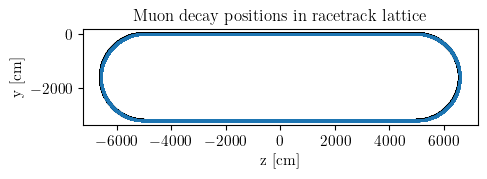

In [8]:
nufact_nue.place_muons_on_lattice(lattice=racetrack_lattice, direction="clockwise")
nufact_numu.place_muons_on_lattice(lattice=racetrack_lattice, direction="clockwise")

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(racetrack_lattice.vertices[0], racetrack_lattice.vertices[1], c='black', marker='+', s=10)
ax.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.5)
fig.gca().set_aspect('equal', adjustable='box')
ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("Muon decay positions in racetrack lattice")
fig.savefig('plots/nufactory_muon_decay_positions.pdf', bbox_inches='tight')

In [9]:
print(np.sum(nufact_numu.weights))

161.67046616710573


In [31]:
print(np.min(racetrack_lattice.vertices[1]))
print(np.max(racetrack_lattice.vertices[0]))

-3183.098861837907
6591.527468179246


In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 50
ax.hist(nufact_numu.pmu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\mu^+$', facecolor='lightgrey', edgecolor='black', lw=0.5, histtype='stepfilled', density=True)
ax.hist(nufact_numu.pnu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\bar\nu_\mu$', color='dodgerblue', histtype='step', density=True)
ax.hist(nufact_nue.pnu['E'], weights=nufact_nue.weights, bins=n_bins, label=r'$\nu_e$', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper left')
ax.set_xlim(0,6)
# ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'$p_\mu = 3.8 \times (1 \pm 0.1)$~GeV',fontsize=fsize)

fig.savefig('plots/lattice_test.pdf', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 30
ax.hist(nufact_numu.pmu['pz']/nufact_numu.pmu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\mu$',color='grey', histtype='step', density=True)
ax.hist(nufact_numu.pnu['pz']/nufact_numu.pnu['E'], weights=nufact_numu.weights, bins=n_bins, label=r'$\bar\nu_\mu$',color='dodgerblue', histtype='step', density=True)
ax.hist(nufact_nue.pnu['pz']/nufact_nue.pnu['E'], weights=nufact_nue.weights, bins=n_bins, label=r'$\nu_e$',color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper center')
# ax.set_xlim(0,6)
ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$\cos{\theta_\nu}$')
ax.set_title(r'$p_\mu = 3.8 \times (1 \pm 0.1)$~GeV',fontsize=fsize)

fig.savefig('plots/3p8GeV_lattice_angle.pdf', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
theta_max = 1 # rad
bins = np.linspace(0, theta_max, 100)
ax.hist(nufact_numu.pmu.deltaangle(nufact_numu.pnu), weights=nufact_numu.weights, bins=bins, label=r'$\bar\nu_\mu$',color='dodgerblue', histtype='step', density=True)
ax.hist(nufact_nue.pmu.deltaangle(nufact_nue.pnu), weights=nufact_nue.weights, bins=bins, label=r'$\nu_e$',color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper center')
ax.set_ylim(1e-4, 30)
ax.set_xlim(0, theta_max)
ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$\theta_{\mu\nu}$/rad')
ax.set_title(r'$p_\mu = 3.8 \times (1 \pm 0.1)$~GeV',fontsize=fsize)

fig.savefig('plots/3p8GeV_lattice_opening_angle.pdf', dpi=300, bbox_inches='tight')

In [ ]:
enu_edges = np.linspace(0, 5, 40)
enu = (enu_edges[1:] + enu_edges[:-1]) / 2

_, flux_numu = nufact_numu.get_flux_at_generic_location(
        det_location=[0, 0, 100e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue = nufact_nue.get_flux_at_generic_location(
        det_location=[0, 0, 100e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_numu_far = nufact_numu.get_flux_at_generic_location(
        det_location=[0, 0, 500e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue_far = nufact_nue.get_flux_at_generic_location(
        det_location=[0, 0, 500e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
_=ax.hist(enu, bins = enu_edges, weights=flux_numu, label=r'$\bar\nu_\mu$ flux ($L=100$~m)', histtype='step', color='dodgerblue', density=True)
_=ax.hist(enu, bins = enu_edges, weights=flux_nue, label=r'$\nu_e$ flux ($L=100$~m)', histtype='step', color='darkorange', density=True)

_=ax.hist(enu, bins = enu_edges, weights=flux_numu_far, label=r'$\bar\nu_\mu$ flux ($L=500$~m)', histtype='step', color='dodgerblue', density=True, lw=0.5, ls='--')
_=ax.hist(enu, bins = enu_edges, weights=flux_nue_far, label=r'$\nu_e$ flux ($L=500$~m)', histtype='step', color='darkorange', density=True, lw=0.5, ls='--')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector")
ax.legend(loc='upper left', ncol=2, fontsize=8)
ax.set_ylim(0, 0.7)
ax.set_xlim(0, 5)
fig.savefig('plots/nufactory_flux.pdf', bbox_inches='tight')

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
L_vals = np.linspace(0, 1e3, 20) * 1e2
colors = plt.cm.viridis(np.linspace(0, 1, len(L_vals)))
lines = []
for i, L in enumerate(L_vals):
        _, flux_numu = nufact_numu.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=None,
                        normalization=1)

        line = ax.hist(enu, bins=enu_edges, weights=flux_numu, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=L_vals[0]/1e2, vmax=L_vals[-1]/1e2))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Detector distance $L$ [m]')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector")
ax.set_ylim(1e-3, 0.5)
ax.set_xlim(0, 4.5)
ax.set_yscale('log')
fig.savefig('plots/nufactory_flux_numu_w_distance.png', bbox_inches='tight')

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
L_vals = np.linspace(0, 1e3, 20) * 1e2
colors = plt.cm.viridis(np.linspace(0, 1, len(L_vals)))
lines = []
for i, L in enumerate(L_vals):
        _, flux_nue = nufact_nue.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=None,
                        normalization=1)
        line = ax.hist(enu, bins=enu_edges, weights=flux_nue, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=L_vals[0]/1e2, vmax=L_vals[-1]/1e2))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Detector distance $L$ [m]')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector")
ax.set_ylim(1e-3, 0.5)
ax.set_xlim(0, 4.5)
ax.set_yscale('log')
fig.savefig('plots/nufactory_flux_nue_w_distance.png', bbox_inches='tight')

# Simplified parameterized lattices

In [ ]:
elliptical_lattice = lt.create_elliptical_lattice(
    length_minor=10e2,
    length_major=10e2,
    center=(0, 0),
    n_elements=100_000,
    beam_p0=3.8,
    beamdiv=1e-3,
    beamdiv_z=0.1,
    beamsize=1,
    )

nufact_nue.place_muons_on_lattice(lattice=elliptical_lattice, direction="clockwise")
nufact_numu.place_muons_on_lattice(lattice=elliptical_lattice, direction="clockwise")

plt.scatter(elliptical_lattice.vertices[0], elliptical_lattice.vertices[1], c='black', marker='+', s=10)
plt.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.2)
plt.gca().set_aspect('equal', adjustable='box')

In [3]:
from mineut.MuC import MuDecaySimulator

PA_numu = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

PA_nue = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )

PA_numu.decay_muons()
PA_nue.decay_muons()

sample_size: 937706
pos x range: 0.0 0.0 0.0
pos y range: -5.55650519825869 -0.0006500883641534448 5.280637661852339
pos z range: -8001.5023659529015 2.9209657430594 8001.2575357277165
s_in_turn min/max: 0.0028850199829122403 15999.98860421776
u_parameter min/max: 1.8031374893201502e-07 0.99999928776361
mutimes min/max: 1.062732143201785e-13 5.357162073802481e-07
muon_lifetime min/max: 5.032229673066048e-06 2.6970348667899038e-05
sample_size: 937776
pos x range: 0.0 0.0 0.0
pos y range: -4.72148447738217 -0.000857628521253896 4.869910206041745
pos z range: -8001.437172417563 -7.2738820557552675 8001.772391396232
s_in_turn min/max: 0.006626549833299578 15999.983025968742
u_parameter min/max: 4.141593645812236e-07 0.9999989391230464
mutimes min/max: 2.4346211524928947e-13 5.356954590524103e-07
muon_lifetime min/max: 5.034830504526617e-06 2.6879351684280647e-05


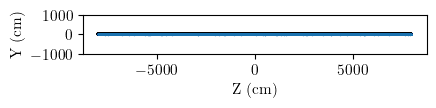

In [4]:
straight_lattice = lt.create_straight_lattice(
            name= r"PA",
            short_name= "pa",
            total_length=160e2,
            n_elements=100_000,
            beamdiv=1e-3,
            beamdiv_z=1e-2,
            beamsize=1,
            Nmu_per_bunch=2e12,
        )

PA_numu.place_muons_on_lattice(lattice=straight_lattice, direction="clockwise")
PA_nue.place_muons_on_lattice(lattice=straight_lattice, direction="clockwise")

plt.scatter(straight_lattice.vertices[0], straight_lattice.vertices[1], c='black', marker='+', s=10)
plt.scatter(PA_numu.pos['z'], PA_numu.pos['y'], marker='.', s=0.1)
plt.ylim(-1000, 1000)
plt.xlabel('Z (cm)')
plt.ylabel('Y (cm)')
plt.gca().set_aspect('equal', adjustable='box')

NOTE the graph below is generated using DECAY WEIGHTS not survivability weights

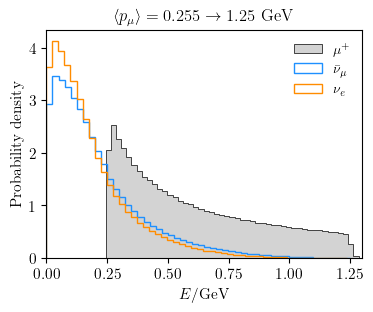

In [5]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 50
ax.hist(PA_numu.pmu['E'], weights=PA_numu.weights, bins=n_bins, label=r'$\mu^+$', facecolor='lightgrey', edgecolor='black', lw=0.5, histtype='stepfilled', density=True)
ax.hist(PA_numu.pnu['E'], weights=PA_numu.weights, bins=n_bins, label=r'$\bar\nu_\mu$', color='dodgerblue', histtype='step', density=True)
ax.hist(PA_nue.pnu['E'], weights=PA_nue.weights, bins=n_bins, label=r'$\nu_e$', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper right')
ax.set_xlim(0,1.3)
# ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'$\langle p_\mu \rangle =0.255 \to 1.25$~GeV',fontsize=fsize)

fig.savefig('plots/PA_energy_spectrum.pdf', dpi=300, bbox_inches='tight')

In [5]:
print(sum(PA_numu.weights))
print(sum(PA_nue.weights))

[4.24286906e+10]
[4.2377061e+10]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# import pt  # assuming pt.std_fig is your custom figure utility

# Bin times and energies
time_bins = np.linspace(PA_numu.mutimes.min(), PA_numu.mutimes.max(), 20)
dt = time_bins[1] - time_bins[0]
enu_edges = np.linspace(0, 1.3, 20)
enu = (enu_edges[1:] + enu_edges[:-1]) / 2



# Set up figure
fig, ax = pt.std_fig(figsize=(5, 3))  # or use plt.subplots()
line0, = ax.step([], [], color='grey')
line1, = ax.step([], [], color='dodgerblue')
line2, = ax.step([], [], color='darkorange')
ax.set_xlim(enu_edges[0], enu_edges[-1])
ax.set_ylim(0, 0.008)
ax.set_xlabel(r'$E_{\nu}$ [GeV]')
ax.set_ylabel('Neutrinos [GeV$^-1$]')
ax.set_title('Neutrino energy spectrum vs time')

def init():
    line0.set_data([], [])
    line1.set_data([], [])
    line2.set_data([], [])
    return line0, line1, line2

def animate(i):
    # Get the time window
    t_min, t_max = time_bins[i], time_bins[i + 1]
    
    # Create mask for valid events in this time bin
    mask_numu = (PA_numu.mutimes >= t_min) & (PA_numu.mutimes < t_max)
    mask_nue = (PA_nue.mutimes >= t_min) & (PA_nue.mutimes < t_max)

    _, flux_numu = PA_numu.get_flux_at_generic_location(
                det_location=[0, 0, 500e2],
                det_radius=10e2,
                ebins=enu_edges,
                acceptance=False,
                per_area=False,
                new_polarization=None,
                normalization=1,
                mask=mask_numu)

    _, flux_nue = PA_nue.get_flux_at_generic_location(
                det_location=[0, 0, 500e2],
                det_radius=10e2,
                ebins=enu_edges,
                acceptance=False,
                per_area=False,
                new_polarization=None,
                normalization=1,
                mask=mask_nue)
    hist_mu, _ = np.histogram(PA_numu.pmu['E'][mask_numu], bins=enu_edges, weights=PA_numu.weights[mask_numu,0], density=True)
    line0.set_data(enu, hist_mu/np.max(hist_mu) * 0.005)
    line1.set_data(enu, flux_numu)
    line2.set_data(enu, flux_nue)
    ax.set_title(f'Neutrino energy spectrum\nTime: {t_min*1e9:.1f} - {t_max*1e9:.1f} ns')
    return line0, line1, line2,

ani = FuncAnimation(fig, animate, frames=len(time_bins)-1, init_func=init, blit=True, interval=200)
fig.tight_layout()
ani.save('plots/numu_energy_vs_time.gif', writer='pillow', fps=10)
plt.show()

In [ ]:
# Bin mutimes and compute average neutrino energy in each bin
bins = np.linspace(PA_numu.mutimes.min(), PA_numu.mutimes.max(), 50)
digitized = np.digitize(PA_numu.mutimes, bins)
avg_mu_E = [PA_numu.pmu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]
avg_numu_E = [PA_numu.pnu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]
bins = np.linspace(PA_nue.mutimes.min(), PA_nue.mutimes.max(), 50)
digitized = np.digitize(PA_nue.mutimes, bins)
avg_nue_E = [PA_nue.pnu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]

fig, ax = pt.std_fig(figsize=(4,3))
ax.step(bins[:-1], avg_mu_E, linestyle='-', color='grey', label=r'$\langle E_{\mu} \rangle$')
ax.step(bins[:-1], avg_nue_E, linestyle='-', color='darkorange', label=r'$\langle E_{\nu_e} \rangle$')
ax.step(bins[:-1], avg_numu_E, linestyle='-', color='dodgerblue', label=r'$\langle E_{\nu_\mu} \rangle$')
ax.set_xlabel('time (s)')
ax.set_ylabel(r'Average neutrino energy [GeV]')
ax.set_title(r'$\langle p_\mu \rangle =0.255 \to 1.25$~GeV', fontsize=fsize)
ax.legend(frameon=False, loc='upper left')
ax.set_ylim(0,1.3)
ax.set_xlim(0,3.5e-7)
fig.savefig('plots/PA_avg_nuE_vs_mutimes.pdf', dpi=300, bbox_inches='tight')


In [5]:
RLA1_numu = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

RLA1_nue = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )

RLA1_numu.decay_muons()
RLA1_nue.decay_muons()


sample_size: 937546
pos x range: -2744.8467499445155 0.40087805132580284 2744.8567453916025
pos y range: -0.04821793396505554 -6.82995118854461e-06 0.04656186567431999
pos z range: -13088.960936005546 -454.20214783851446 12079.210390733348
s_in_turn min/max: 0.19043164890970118 120045.359662497
u_parameter min/max: 1.5863305424801413e-06 0.9999998508962725
mutimes min/max: 6.374107181625929e-12 4.005179565388704e-06
muon_lifetime min/max: 2.53721090576278e-05 0.00010828930261596383
sample_size: 937337
pos x range: -2744.8464266219607 -0.6464960689790971 2744.8633282470096
pos y range: -0.049411392327260384 -1.0033285602405002e-05 0.04808093123511397
pos z range: -13088.960879835984 -468.74272129403477 12079.210321007717
s_in_turn min/max: 0.00792516945809033 120045.12127164002
u_parameter min/max: 6.601811430861915e-08 0.9999978650567357
mutimes min/max: 2.653358612791177e-13 4.005205259387399e-06
muon_lifetime min/max: 2.531122756082035e-05 0.0001080265465827139


Text(0.5, 1.0, 'RLA 1')

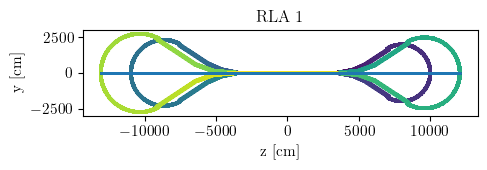

In [6]:

RLA1_lattice = lt.create_RLA_lattice(
            name = r"RLA1",
            short_name= "rla1",
            straight_length=70e2,
            n_elements=100_000,
            p0_injection=1.25,
            dp_dx_LA=0.84/70e2,
            beamdiv=1e-3,
            beamdiv_z=1e-2,
            beamsize=1e-2,
            Nmu_per_bunch=2e12,
        )
RLA1_nue.place_muons_on_lattice(lattice=RLA1_lattice, direction="clockwise")
RLA1_numu.place_muons_on_lattice(lattice=RLA1_lattice, direction="clockwise")

max_index = len(RLA1_lattice.vertices[1])

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(RLA1_lattice.vertices[0], RLA1_lattice.vertices[1], c=np.linspace(0,1,max_index), marker='+', s=10)
#ax.scatter(RLA_lattice.vertices[0], RLA_lattice.vertices[1], c='black')
ax.scatter(RLA1_numu.pos['z'], RLA1_numu.pos['y'], marker='.', s=0.25)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("RLA 1")

Text(0.5, 1.0, 'RLA 1')

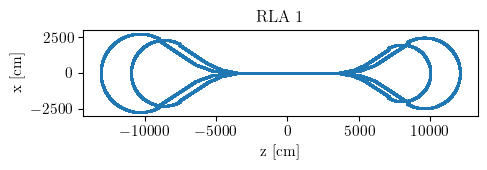

In [9]:
fig, ax = pt.std_fig(figsize=(5, 2))

ax.scatter(RLA1_numu.pos['z'], RLA1_numu.pos['x'], marker='.', s=0.25)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("x [cm]")
ax.set_title("RLA 1")

In [13]:
print(np.max(RLA1_lattice.vertices[1]))
print(np.min(RLA1_lattice.vertices[0]))

2744.847121187773
-13088.960860165247


In [8]:
print(sum(RLA1_numu.weights))
print(sum(RLA1_nue.weights))

[6.74592308e+10]
[6.74740903e+10]


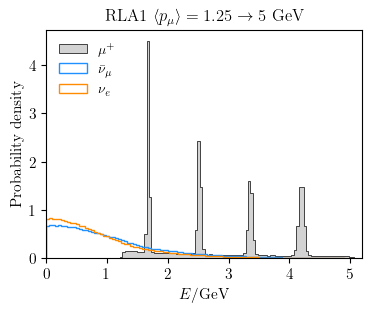

In [8]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 100
ax.hist(RLA1_numu.pmu['E'], weights=RLA1_numu.weights, bins=n_bins, label=r'$\mu^+$', facecolor='lightgrey', edgecolor='black', lw=0.5, histtype='stepfilled', density=True)
ax.hist(RLA1_numu.pnu['E'], weights=RLA1_numu.weights, bins=n_bins, label=r'$\bar\nu_\mu$', color='dodgerblue', histtype='step', density=True)
ax.hist(RLA1_nue.pnu['E'], weights=RLA1_nue.weights, bins=n_bins, label=r'$\nu_e$', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper left')
ax.set_xlim(0,5.2)
# ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'RLA1 $\langle p_\mu \rangle = 1.25 \to 5$~GeV',fontsize=fsize)

fig.savefig('plots/RLA1_energy_spectrum.pdf', dpi=300, bbox_inches='tight')

In [10]:

RLA2_numu = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

RLA2_nue = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )

RLA2_numu.decay_muons()
RLA2_nue.decay_muons()


sample_size: 937731
pos x range: -32506.82277184533 -21.703497439159626 32506.812792253524
pos y range: -0.04435087021827554 2.7951522876217016e-06 0.04753228512122806
pos z range: -155010.6936782842 -5769.005017646318 143052.3619757458
s_in_turn min/max: 0.920715953603094 1463129.804510595
u_parameter min/max: 6.292781856709341e-07 0.9999996906542161
mutimes min/max: 3.071842992444713e-11 4.880482614383952e-05
muon_lifetime min/max: 0.00010130085051078708 0.001347327134751544
sample_size: 937376
pos x range: -32506.824915702928 3.9443878465140094 32506.820196456272
pos y range: -0.04862409930327222 2.6010471517406916e-06 0.044788612608638784
pos z range: -155010.69368039246 -5957.304563796165 143052.361953883
s_in_turn min/max: 0.07045812082655327 1463130.2034328869
u_parameter min/max: 4.8155740395294806e-08 0.999999963304098
mutimes min/max: 2.350753720386147e-12 4.880484005343355e-05
muon_lifetime min/max: 0.00010172449269148145 0.001347911630478592


Text(0.5, 1.0, 'RLA 2')

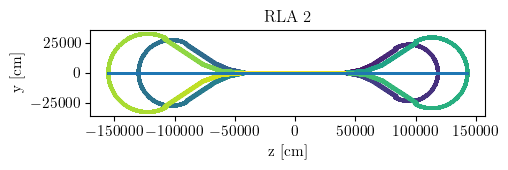

In [11]:
RLA2_lattice = lt.create_RLA_lattice(
            name = r"RLA2",
            short_name= "rla2",
            straight_length=829e2,
            n_elements=100_000,
            p0_injection=5.0,
            dp_dx_LA=11.6/829e2,
            beamdiv=1e-3,
            beamdiv_z=1e-2,
            beamsize=1e-2,
            half=False,
            Nmu_per_bunch=2e12,
        )
RLA2_nue.place_muons_on_lattice(lattice=RLA2_lattice, direction="clockwise")
RLA2_numu.place_muons_on_lattice(lattice=RLA2_lattice, direction="clockwise")

max_index = len(RLA2_lattice.vertices[1])

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(RLA2_lattice.vertices[0], RLA2_lattice.vertices[1], c=np.linspace(0, 1, max_index), marker='+', s=10)
#ax.scatter(RLA_lattice.vertices[0], RLA_lattice.vertices[1], c='black')
ax.scatter(RLA2_numu.pos['z'], RLA2_numu.pos['y'], marker='.', s=0.25)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("RLA 2")

In [ ]:
print(np.min(RLA2_lattice.vertices[1]))
print(np.min(RLA2_lattice.vertices[0]))

In [16]:
print(sum(RLA2_numu.weights))
print(sum(RLA2_nue.weights))

[8.08680886e+10]
[8.09935647e+10]


In [ ]:
# Use geometrically spaced energy bins
energy_min = 1e-3  # avoid zero for logspace
energy_max = 65
n_bins = 100
energy_bins = np.geomspace(energy_min, energy_max, n_bins + 1)

fig, ax = pt.std_fig(figsize=(4,3))
fsize = 12

ax.hist(PA_numu.pnu['E'], weights=PA_numu.weights*PA_numu.pnu['E'], bins=energy_bins, label=r'$\bar\nu_\mu$ (PA)', color='dodgerblue', histtype='step', density=True)
ax.hist(PA_nue.pnu['E'], weights=PA_nue.weights*PA_nue.pnu['E'], bins=energy_bins, label=r'$\nu_e$ (PA)', color='darkorange', histtype='step', density=True)

ax.hist(RLA1_numu.pnu['E'], weights=RLA1_numu.weights*RLA1_numu.pnu['E'], bins=energy_bins, label=r'$\bar\nu_\mu$ (RLA1)', color='dodgerblue', histtype='step', density=True)
ax.hist(RLA1_nue.pnu['E'], weights=RLA1_nue.weights*RLA1_nue.pnu['E'], bins=energy_bins, label=r'$\nu_e$ (RLA1)', color='darkorange', histtype='step', density=True)

ax.hist(RLA2_numu.pnu['E'], weights=RLA2_numu.weights*RLA2_numu.pnu['E'], bins=energy_bins, label=r'$\bar\nu_\mu$ (RLA2)', color='dodgerblue', histtype='step', density=True)
ax.hist(RLA2_nue.pnu['E'], weights=RLA2_nue.weights*RLA2_nue.pnu['E'], bins=energy_bins, label=r'$\nu_e$ (RLA2)', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False, loc='lower left')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(energy_min, energy_max)
ax.set_ylim(1e-4, 1e1)
ax.set_ylabel(r'Neutrino rate (GeV$^{-1}$)')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'RLA2 $\langle p_\mu \rangle = 5 \to 63$~GeV', fontsize=fsize)

fig.savefig('plots/RLA2_energy_spectrum_logE.pdf', dpi=300, bbox_inches='tight')

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
fsize=12
n_bins = 100
ax.hist(RLA2_numu.pmu['E'], weights=RLA2_numu.weights, bins=n_bins, label=r'$\mu^+$', facecolor='lightgrey', edgecolor='black', lw=0.5, histtype='stepfilled', density=True)
ax.hist(RLA2_numu.pnu['E'], weights=RLA2_numu.weights, bins=n_bins, label=r'$\bar\nu_\mu$', color='dodgerblue', histtype='step', density=True)
ax.hist(RLA2_nue.pnu['E'], weights=RLA2_nue.weights, bins=n_bins, label=r'$\nu_e$', color='darkorange', histtype='step', density=True)

ax.legend(frameon=False,loc='upper left')
ax.set_xlim(0,65)
# ax.set_yscale('log')
ax.set_ylabel(r'Probability density')
ax.set_xlabel(r'$E/$GeV')
ax.set_title(r'RLA2 $\langle p_\mu \rangle = 5 \to 63$~GeV',fontsize=fsize)

fig.savefig('plots/RLA2_energy_spectrum.pdf', dpi=300, bbox_inches='tight')

In [ ]:
def make_animation_over_time(MuC_acc_numu, MuC_acc_nue, name='test'):

    # Bin times and energies
    time_bins = np.linspace(MuC_acc_numu.mutimes.min(), MuC_acc_numu.mutimes.max(), 20)
    dt = time_bins[1] - time_bins[0]
    enu_edges = np.linspace(0, 1.3, 20)
    enu = (enu_edges[1:] + enu_edges[:-1]) / 2

    # Set up figure
    fig, ax = pt.std_fig(figsize=(5, 3))  # or use plt.subplots()
    line0, = ax.step([], [], color='grey')
    line1, = ax.step([], [], color='dodgerblue')
    line2, = ax.step([], [], color='darkorange')
    ax.set_xlim(enu_edges[0], enu_edges[-1])
    ax.set_ylim(0, 0.008)
    ax.set_xlabel(r'$E_{\nu}$ [GeV]')
    ax.set_ylabel('Neutrinos [GeV$^-1$]')
    ax.set_title('Neutrino energy spectrum vs time')

    def init():
        line0.set_data([], [])
        line1.set_data([], [])
        line2.set_data([], [])
        return line0, line1, line2

    def animate(i):
        # Get the time window
        t_min, t_max = time_bins[i], time_bins[i + 1]
        
        # Create mask for valid events in this time bin
        mask_numu = (MuC_acc_numu.mutimes >= t_min) & (MuC_acc_numu.mutimes < t_max)
        mask_nue = (MuC_acc_nue.mutimes >= t_min) & (MuC_acc_nue.mutimes < t_max)

        _, flux_numu = MuC_acc_numu.get_flux_at_generic_location(
                    det_location=[0, 0, 1e5],
                    det_radius=10e5,
                    ebins=enu_edges,
                    acceptance=False,
                    per_area=False,
                    new_polarization=None,
                    normalization=1,
                    mask=mask_numu)
        
        _, flux_nue = MuC_acc_nue.get_flux_at_generic_location(
                    det_location=[0, 0, 1e5],
                    det_radius=10e5,
                    ebins=enu_edges,
                    acceptance=False,
                    per_area=False,
                    new_polarization=None,
                    normalization=1,
                    mask=mask_nue)
        hist_mu, _ = np.histogram(MuC_acc_numu.pmu['E'][mask_numu], bins=enu_edges, weights=MuC_acc_numu.weights[mask_numu,0], density=True)
        line0.set_data(enu, hist_mu/np.max(hist_mu) * 0.005)
        line1.set_data(enu, flux_numu)
        line2.set_data(enu, flux_nue)
        ax.set_title(f'Neutrino energy spectrum\nTime: {t_min*1e9:.1f} - {t_max*1e9:.1f} ns')
        return line0, line1, line2,

    ani = FuncAnimation(fig, animate, frames=len(time_bins)-1, init_func=init, blit=True, interval=200)
    fig.tight_layout()
    ani.save(f'plots/numu_energy_vs_time_{name}.gif', writer='pillow', fps=10)
    plt.show()
make_animation_over_time(RLA1_numu, RLA1_nue, name='RLA1')
make_animation_over_time(RLA2_numu, RLA2_nue, name='RLA2')

(<Figure size 400x300 with 1 Axes>,
 <Axes: xlabel='time (ns)', ylabel='Average neutrino energy [GeV]'>)

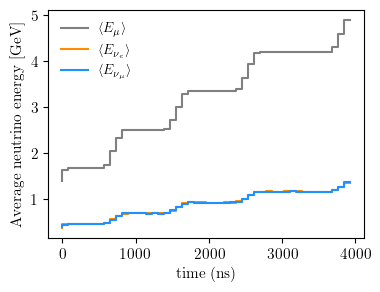

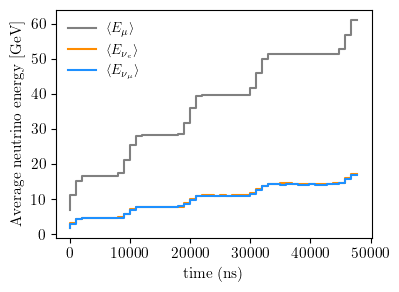

In [12]:
def plot_avgE_vs_time(MuC_acc_numu, MuC_acc_nue):
    # Bin mutimes and compute average neutrino energy in each bin
    bins = np.linspace(MuC_acc_numu.mutimes.min(), MuC_acc_numu.mutimes.max(), 50)
    digitized = np.digitize(MuC_acc_numu.mutimes, bins)
    avg_mu_E = [MuC_acc_numu.pmu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]
    avg_numu_E = [MuC_acc_numu.pnu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]
    bins = np.linspace(MuC_acc_nue.mutimes.min(), MuC_acc_nue.mutimes.max(), 50)
    digitized = np.digitize(MuC_acc_nue.mutimes, bins)
    avg_nue_E = [MuC_acc_nue.pnu['E'][digitized == i].mean() if np.any(digitized == i) else np.nan for i in range(1, len(bins))]

    fig, ax = pt.std_fig(figsize=(4,3))
    ax.step(1e9*bins[:-1], avg_mu_E, linestyle='-', color='grey', label=r'$\langle E_{\mu} \rangle$')
    ax.step(1e9*bins[:-1], avg_nue_E, linestyle='-', color='darkorange', label=r'$\langle E_{\nu_e} \rangle$')
    ax.step(1e9*bins[:-1], avg_numu_E, linestyle='-', color='dodgerblue', label=r'$\langle E_{\nu_\mu} \rangle$')
    ax.set_xlabel('time (ns)')
    ax.set_ylabel(r'Average neutrino energy [GeV]')
    ax.legend(frameon=False, loc='upper left')
    return fig, ax

plot_avgE_vs_time(RLA1_numu, RLA1_nue)
plot_avgE_vs_time(RLA2_numu, RLA2_nue)

(<Figure size 400x300 with 1 Axes>,
 <Axes: xlabel='time (ns)', ylabel='Average neutrino energy [GeV]'>)

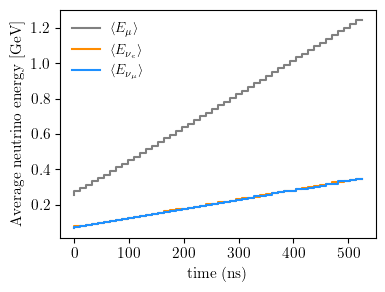

In [13]:
plot_avgE_vs_time(PA_numu, PA_nue)

# Collider lattices

In [ ]:
import pickle
with open('beam-optics/ring_v06_smoothed.pkl', 'rb') as f:
    lattice_10TeV_dict = pickle.load(f)
with open('beam-optics/ring_3tev_v1.2_smoothed.pkl', 'rb') as f:
    lattice_3TeV_dict = pickle.load(f)

In [ ]:
lattice_10TeV = lt.Lattice(**lattice_10TeV_dict)
lattice_3TeV = lt.Lattice(**lattice_3TeV_dict)

In [ ]:
nufact_nue.place_muons_on_lattice(lattice_3TeV)
nufact_numu.place_muons_on_lattice(lattice_3TeV)

plt.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.5)
plt.gca().set_aspect('equal', adjustable='box')

In [ ]:
nufact_nue.place_muons_on_lattice(lattice_10TeV)
nufact_numu.place_muons_on_lattice(lattice_10TeV)

plt.scatter(nufact_numu.pos['z'], nufact_numu.pos['y'], marker='.', s=0.5)
plt.gca().set_aspect('equal', adjustable='box')

# Practice placing detector for RLA's and PA

In [ ]:
design = {
    "name": r"RLA1",
    "short_name": "rla1",
    "muon_polarization": 0.0,
    }

RLA1_numu = MuDecaySimulator(
    design,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

RLA1_nue = MuDecaySimulator(
    design,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )

RLA1_numu.decay_muons()
RLA1_nue.decay_muons()


RLA1_lattice = lt.create_RLA_lattice(
            straight_length=70e2,
            n_elements=100_000,
            p0_injection=1.25,
            dp_dx_LA=0.75/70e2,
            beamdiv=1e-3,
            beamdiv_z=1e-2,
            beamsize=1e-2,
        )
RLA1_nue.place_muons_on_lattice(lattice=RLA1_lattice, direction="clockwise")
RLA1_numu.place_muons_on_lattice(lattice=RLA1_lattice, direction="clockwise")

max_index = len(RLA1_lattice.vertices[1])

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(RLA1_lattice.vertices[0], RLA1_lattice.vertices[1], c=np.linspace(0,1,max_index), marker='+', s=10)
#ax.scatter(RLA_lattice.vertices[0], RLA_lattice.vertices[1], c='black')
ax.scatter(RLA1_numu.pos['z'], RLA1_numu.pos['y'], marker='.', s=0.25)
ax.scatter(15000, 0, marker='.', s=10)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("RLA 1")

In [ ]:
enu_edges = np.linspace(0, 5, 40)
enu = (enu_edges[1:] + enu_edges[:-1]) / 2

_, flux_numu = RLA1_numu.get_flux_at_generic_location(
        det_location=[0, 0, 150e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue = RLA1_nue.get_flux_at_generic_location(
        det_location=[0, 0, 150e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_numu_far = RLA1_numu.get_flux_at_generic_location(
        det_location=[0, 0, 500e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue_far = RLA1_nue.get_flux_at_generic_location(
        det_location=[0, 0, 500e2],
        det_radius=10e2,
        ebins=enu_edges,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
_=ax.hist(enu, bins = enu_edges, weights=flux_numu, label=r'$\bar\nu_\mu$ flux ($L=150$~m)', histtype='step', color='dodgerblue', density=True)
_=ax.hist(enu, bins = enu_edges, weights=flux_nue, label=r'$\nu_e$ flux ($L=150$~m)', histtype='step', color='darkorange', density=True)

_=ax.hist(enu, bins = enu_edges, weights=flux_numu_far, label=r'$\bar\nu_\mu$ flux ($L=500$~m)', histtype='step', color='dodgerblue', density=True, lw=0.5, ls='--')
_=ax.hist(enu, bins = enu_edges, weights=flux_nue_far, label=r'$\nu_e$ flux ($L=500$~m)', histtype='step', color='darkorange', density=True, lw=0.5, ls='--')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector (RLA1)")
ax.legend(loc='upper left', ncol=2, fontsize=8)
ax.set_ylim(0, 0.8)
ax.set_xlim(0, 5)
fig.savefig('plots/RLA1_flux.pdf', bbox_inches='tight')

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
L_vals = np.linspace(0, 1e3, 20) * 1e2
colors = plt.cm.viridis(np.linspace(0, 1, len(L_vals)))
lines = []
for i, L in enumerate(L_vals):
        _, flux_numu = RLA1_numu.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=None,
                        normalization=1)

        line = ax.hist(enu, bins=enu_edges, weights=flux_numu, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=L_vals[0]/1e2, vmax=L_vals[-1]/1e2))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Detector distance $L$ [m]')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Muon Neutrino flux through detector")
ax.set_ylim(1e-3, 0.5)
ax.set_xlim(0, 4.5)
ax.set_yscale('log')
fig.savefig('plots/RLA1_flux_numu_w_distance.png', bbox_inches='tight')

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
L_vals = np.linspace(0, 1e3, 20) * 1e2
colors = plt.cm.viridis(np.linspace(0, 1, len(L_vals)))
lines = []
for i, L in enumerate(L_vals):
        _, flux_nue = RLA1_nue.get_flux_at_generic_location(
                        det_location=[0, 0, L],
                        det_radius=10e2,
                        ebins=enu_edges,
                        acceptance=False,
                        per_area=False,
                        new_polarization=None,
                        normalization=1)
        line = ax.hist(enu, bins=enu_edges, weights=flux_nue, histtype='step', color=colors[i], density=False)[2][0]
        lines.append(line)

sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=L_vals[0]/1e2, vmax=L_vals[-1]/1e2))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label('Detector distance $L$ [m]')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Electron Neutrino flux through detector")
ax.set_ylim(1e-3, 0.5)
ax.set_xlim(0, 4.5)
ax.set_yscale('log')
fig.savefig('plots/RLA1_flux_nue_w_distance.png', bbox_inches='tight')

# Combine the 3 accelerators

In [14]:
combined_numu = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

combined_nue = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )

combined_numu.decay_muons()
combined_nue.decay_muons()

total: 140787.8934551999
is different; lattice nmu per bunch is: 1000000.0
sample_size: 937511
pos x range: 0.0 0.0 0.0
pos y range: -6488.840943331825 -3257.123428136245 0.0
pos z range: -7999.999651663913 4166.050032920229 17168.21029579302
s_in_turn min/max: 0.00034833608682578596 140787.80932951023
u_parameter min/max: 2.4741906301528616e-09 0.9999994024651134
mutimes min/max: 1.2577167347428866e-14 4.697199529912717e-06
muon_lifetime min/max: 5.739415733116827e-06 0.00010523658743166395
sample_size: 937595
pos x range: 0.0 0.0 0.0
pos y range: -6488.841146195726 -3257.207606112999 0.0
pos z range: -7999.960860165247 4165.694151517185 17168.21029579302
s_in_turn min/max: 0.0944672495298671 140787.76889025752
u_parameter min/max: 6.709898643375567e-07 0.9999991152298142
mutimes min/max: 3.410861908430388e-12 4.6971981826737275e-06
muon_lifetime min/max: 5.739531557196449e-06 0.00010523648655003211


Text(0.5, 1.0, 'PA+RLA1')

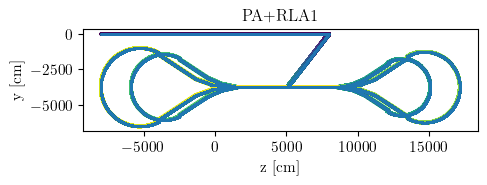

In [12]:
combined_lattice = lt.append_lattices(
            straight_lattice,
            RLA1_lattice,
            -37.44e2,
            -29.11e2)


combined_nue.place_muons_on_lattice(lattice=combined_lattice, direction="clockwise")
combined_numu.place_muons_on_lattice(lattice=combined_lattice, direction="clockwise")

max_index = len(combined_lattice.vertices[1])

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(combined_lattice.vertices[0], combined_lattice.vertices[1], c=np.linspace(0,1,max_index), marker='+', s=10)
#ax.scatter(RLA_lattice.vertices[0], RLA_lattice.vertices[1], c='black')
ax.scatter(combined_numu.pos['z'], combined_numu.pos['y'], marker='.', s=0.25)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title(combined_lattice.name)

In [9]:
print(sum(combined_numu.weights))

[111442.53912606]


(<Figure size 400x300 with 1 Axes>,
 <Axes: xlabel='time (ns)', ylabel='Average neutrino energy [GeV]'>)

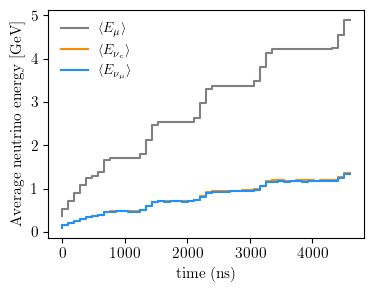

In [14]:
plot_avgE_vs_time(combined_numu, combined_nue)

is same; lattice nmu per bunch is: 2000000000000.0
is same; lattice nmu per bunch is: 2000000000000.0
sample_size: 937557
pos x range: -76244.81128896249 -39190.79667278259 0.0
pos y range: 0.0 0.0 0.0
pos z range: -15000.693615385564 118323.99061148896 283062.36193160596
s_in_turn min/max: 3.7069204691552438 1708812.671320837
u_parameter min/max: 2.1692957781205284e-06 0.9999999040551063
mutimes min/max: 1.3382537134586095e-10 5.699993527066193e-05
muon_lifetime min/max: 5.743977396777204e-06 0.001311194744425043
sample_size: 937444
pos x range: -76244.80949564028 -39170.52293922241 0.0
pos y range: 0.0 0.0 0.0
pos z range: -15000.693615385564 118274.420559541 283062.36193160596
s_in_turn min/max: 0.7832208014765515 1708812.7465196073
u_parameter min/max: 4.5834206374717473e-07 0.9999999480615467
mutimes min/max: 2.82784806386435e-11 5.6999937778999726e-05
muon_lifetime min/max: 5.740379159368987e-06 0.0013111949632193302


Text(0.5, 1.0, 'Combined Accelerators')

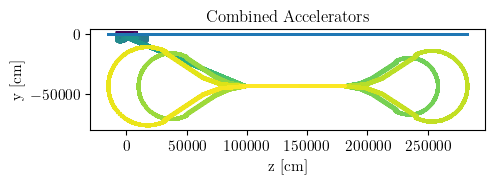

In [15]:
combined_lattice =lt.append_lattices(
    lt.append_lattices(
            straight_lattice,
            RLA1_lattice,
            -37.44e2,
            -29.11e2),
    RLA2_lattice,
    (-335.06e2)-(27.44e2)-(37.44e2),
    1550.1e2-165.89e2
)


combined_nue.place_muons_on_lattice(lattice=combined_lattice, direction="clockwise")
combined_numu.place_muons_on_lattice(lattice=combined_lattice, direction="clockwise")

max_index = len(combined_lattice.vertices[1])

fig, ax = pt.std_fig(figsize=(5, 2))
ax.scatter(combined_lattice.vertices[0], combined_lattice.vertices[1], c=np.linspace(0,1,max_index), marker='+', s=10)
#ax.scatter(RLA_lattice.vertices[0], RLA_lattice.vertices[1], c='black')
ax.scatter(combined_numu.pos['z'], combined_numu.pos['y'], marker='.', s=0.25)

fig.gca().set_aspect('equal', adjustable='box')

ax.set_xlabel("z [cm]")
ax.set_ylabel("y [cm]")
ax.set_title("Combined Accelerators")

In [38]:
print(np.max(combined_lattice.vertices[0]))
print(np.min(combined_lattice.vertices[1]))

283062.36193160596
-76244.83233520949


In [11]:
print(sum(combined_numu.weights))

[2.21641337e+11]


(<Figure size 400x300 with 1 Axes>,
 <Axes: xlabel='time (ns)', ylabel='Average neutrino energy [GeV]'>)

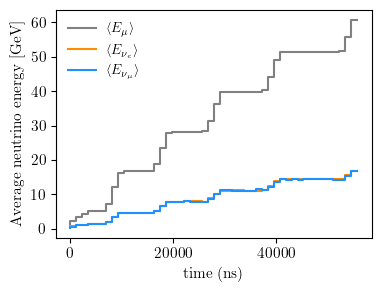

In [13]:
plot_avgE_vs_time(combined_numu, combined_nue)

In [ ]:
enu_edges1 = np.linspace(0, 5, 40)
enu1 = (enu_edges1[1:] + enu_edges1[:-1]) / 2

enu_edges2 = np.linspace(0, 5, 40)
enu2 = (enu_edges2[1:] + enu_edges2[:-1]) / 2

enu_edges3 = np.linspace(0, 63, 40)
enu3 = (enu_edges3[1:] + enu_edges3[:-1]) / 2

_, flux_numu = combined_numu.get_flux_at_generic_location(
        det_location=[0, 0, 50e2],
        det_radius=10e2,
        ebins=enu_edges1,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue = combined_nue.get_flux_at_generic_location(
        det_location=[0, 0, 50e2],
        det_radius=10e2,
        ebins=enu_edges1,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_numu_mid = combined_numu.get_flux_at_generic_location(
        det_location=[0, 0, 200e2],
        det_radius=10e2,
        ebins=enu_edges2,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue_mid = RLA1_nue.get_flux_at_generic_location(
        det_location=[0, 0, 200e2],
        det_radius=10e2,
        ebins=enu_edges2,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_numu_far = combined_numu.get_flux_at_generic_location(
        det_location=[0, 0, 1500e2],
        det_radius=10e2,
        ebins=enu_edges3,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

_, flux_nue_far = RLA1_nue.get_flux_at_generic_location(
        det_location=[0, 0, 1500e2],
        det_radius=10e2,
        ebins=enu_edges3,
        acceptance=False,
        per_area=False,
        new_polarization=None,
        normalization=1)

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
_=ax.hist(enu1, bins = enu_edges1, weights=flux_numu, label=r'$\bar\nu_\mu$ flux ($L=50$~m)', histtype='step', color='dodgerblue', density=True)
_=ax.hist(enu1, bins = enu_edges1, weights=flux_nue, label=r'$\nu_e$ flux ($L=50$~m)', histtype='step', color='darkorange', density=True)

print(flux_numu)

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Near Neutrino flux through detector (Combined)")
ax.legend(loc='upper left', ncol=2, fontsize=8)
ax.set_xlim(0,5)
fig.savefig('plots/combined_flux.pdf', bbox_inches='tight')


In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
_=ax.hist(enu, bins = enu_edges1, weights=flux_numu, label=r'$\bar\nu_\mu$ flux ($L=50$~m)', histtype='step', color='dodgerblue', density=True)
_=ax.hist(enu, bins = enu_edges1, weights=flux_nue, label=r'$\nu_e$ flux ($L=50$~m)', histtype='step', color='darkorange', density=True)

_=ax.hist(enu, bins = enu_edges2, weights=flux_numu_mid, label=r'$\bar\nu_\mu$ flux ($L=200$~m)', histtype='step', color='dodgerblue', density=True, lw=0.5, ls='-')
_=ax.hist(enu, bins = enu_edges2, weights=flux_nue_mid, label=r'$\nu_e$ flux ($L=200$~m)', histtype='step', color='darkorange', density=True, lw=0.5, ls='-')

_=ax.hist(enu, bins = enu_edges3, weights=flux_numu_far, label=r'$\bar\nu_\mu$ flux ($L=1500$~m)', histtype='step', color='dodgerblue', density=True, lw=0.5, ls='--')
_=ax.hist(enu, bins = enu_edges3, weights=flux_nue_far, label=r'$\nu_e$ flux ($L=1500$~m)', histtype='step', color='darkorange', density=True, lw=0.5, ls='--')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector (Combined)")
ax.legend(loc='upper left', ncol=2, fontsize=8)
ax.set_ylim(0, 0.8)
ax.set_xlim(0, 65)
fig.savefig('plots/combined_flux.pdf', bbox_inches='tight')

In [ ]:
fig, ax = pt.std_fig(figsize=(4,3))
_=ax.hist(enu, bins = enu_edges1, weights=flux_numu, label=r'$\bar\nu_\mu$ flux ($L=50$~m)', histtype='step', color='dodgerblue', density=True)
_=ax.hist(enu, bins = enu_edges1, weights=flux_nue, label=r'$\nu_e$ flux ($L=50$~m)', histtype='step', color='darkorange', density=True)

_=ax.hist(enu, bins = enu_edges2, weights=flux_numu_mid, label=r'$\bar\nu_\mu$ flux ($L=200$~m)', histtype='step', color='dodgerblue', density=True, lw=0.5, ls='-')
_=ax.hist(enu, bins = enu_edges2, weights=flux_nue_mid, label=r'$\nu_e$ flux ($L=200$~m)', histtype='step', color='darkorange', density=True, lw=0.5, ls='-')

_=ax.hist(enu, bins = enu_edges3, weights=flux_numu_far, label=r'$\bar\nu_\mu$ flux ($L=1500$~m)', histtype='step', color='dodgerblue', density=True, lw=0.5, ls='--')
_=ax.hist(enu, bins = enu_edges3, weights=flux_nue_far, label=r'$\nu_e$ flux ($L=1500$~m)', histtype='step', color='darkorange', density=True, lw=0.5, ls='--')

ax.set_xlabel(r"$E_\nu$ [GeV]")
ax.set_ylabel(r"Flux [s$^{-1}$ GeV$^{-1}$]")
ax.set_title("Neutrino flux through detector (Combined)")
ax.legend(loc='upper left', ncol=2, fontsize=8)
ax.set_ylim(0, 0.8)
ax.set_xlim(0, 65)
fig.savefig('plots/combined_flux.pdf', bbox_inches='tight')

In [19]:
PA_RLA1 = lt.append_lattices(
            straight_lattice,
            RLA1_lattice,
            -37.44e2,
            -29.11e2
)

total: 140787.8934551999
is different; lattice nmu per bunch is: 1000000.0


In [21]:
print(sum(combined_numu.weights[combined_numu.s_muon<=160e2,0]))

print(sum(combined_numu.weights[combined_numu.s_muon<=140787.8934551999,0]))

39439366729.3737
111346210390.88452


In [ ]:
combined_lattice = lt.append_lattices(
        RLA1_lattice,
        RLA2_lattice,
        p0_injection = 5
)


combined_nue.place_muons_on_lattice(lattice=combined_lattice, direction="clockwise")
combined_numu.place_muons_on_lattice(lattice=combined_lattice, direction="clockwise")

plot_avgE_vs_time(combined_numu, combined_nue)

Test if the u ranges makes sense; 0 to 0.5 and 0.5 to 1

In [ ]:
X, Y, acc_map = combined_numu.get_acceptance_map_fixed_z(
    z_location=293062,           # 100m downstream
    xrange=(-5000,5000),  
    yrange=(-77245, 10e2),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, acc_map, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Acceptance (Fraction of Neutrinos)')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Acceptance Map at z = {293062:.0f} cm")
plt.tight_layout()
plt.show()

In [ ]:
X, Y, acc_map = combined_numu.get_acceptance_map_fixed_z(
    z_location=284062,           # 10m downstream
    xrange=(-5000,5000),  
    yrange=(-77245, 10e2),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, acc_map, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Acceptance (Fraction of Neutrinos)')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Acceptance Map at z = {293062:.0f} cm")
plt.tight_layout()
plt.show()

TESTS BELOW

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import mineut
from mineut import plot_tools as pt
from mineut import lattice_tools as lt

from mineut.MuC import MuDecaySimulator


PA_numu = MuDecaySimulator(
    muon_polarization=0.0,
    nuflavor='numu',
    direction="right",
    n_evals=1e6,
    )

PA_nue = MuDecaySimulator(
    muon_polarization = 0.0,
    nuflavor='nue',
    direction="right",
    n_evals=1e6,
    )


In [2]:
straight_lattice = lt.create_straight_lattice(
            total_length=160e2,
            n_elements=100_000,
            beam_p0=3.8,
            beamdiv=1e-3,
            beamdiv_z=1e-2,
            beamsize=1,
            Nmu_per_bunch=1e6,
        )

PA_numu.decay_muons()
print("total length: ",160e9)
#PA_nue.decay_muons()

PA_numu.place_muons_on_lattice(lattice=straight_lattice, direction="clockwise")
#PA_nue.place_muons_on_lattice(lattice=straight_lattice, direction="clockwise")

total length:  160000000000.0


In [ ]:
np.mean(PA_numu.pmu['E'])

In [39]:
print(sum(PA_numu.weights))
print(sum(PA_nue.weights))

[42404.33479813]
[42390.87094784]


In [4]:
PA_numu.num_events(
        decay_weights=PA_numu.weights[:, 0]
    )

np.float64(5.38981330980807e-08)

Get event mapping

5.356893286323059e-07
[1.62808667e-03 9.96533344e-04 1.83349854e-03 ... 9.98587208e-01
 1.17710972e+00 2.84366376e-01]
[9.73373990e-15 5.95791154e-15 1.09618230e-14 ... 5.97019085e-12
 7.03751222e-12 1.70012346e-12]
415438
415438


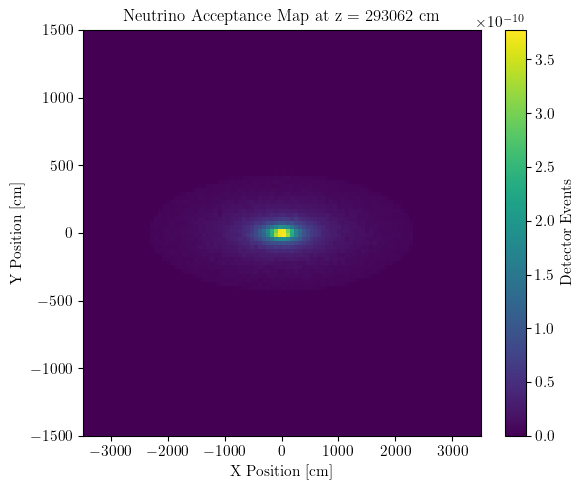

In [24]:
X, Y, event_map = PA_numu.get_event_map_fixed_z(
    z_location=90e2,           # 10m downstream
    xrange=(-3500,3500),  
    yrange=(-15e2, 15e2),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, event_map, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Events')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Acceptance Map at z = {293062:.0f} cm")
plt.tight_layout()
plt.show()

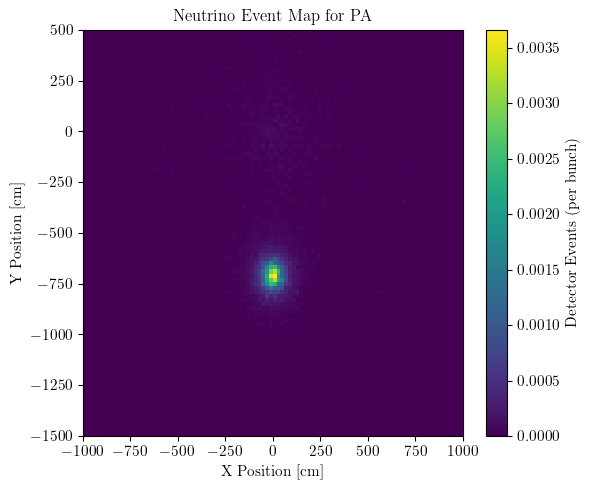

In [23]:
X, Y, event_map = combined_numu.get_event_map_fixed_z(
    detect_loc=[(90e2, 0)],
    xrange=(-1000,1000),  
    yrange=(-15e2, 5e2),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, event_map.T, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Events (per bunch)')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Event Map for PA")
plt.tight_layout()
plt.show()

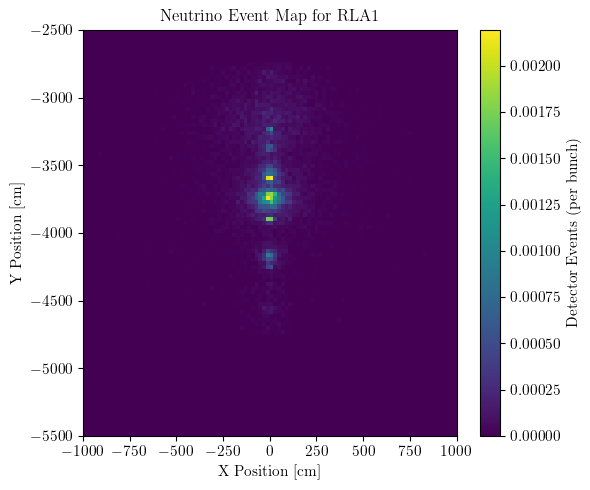

In [31]:
X, Y, event_map = combined_numu.get_event_map_fixed_z(
    detect_loc=[(27.45e2-29.11e2, 37.44e2)],
    xrange=(-1000,1000),  
    yrange=(-55e2, -25e2),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, event_map.T, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Events (per bunch)')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Event Map for RLA1")
plt.tight_layout()
plt.show()

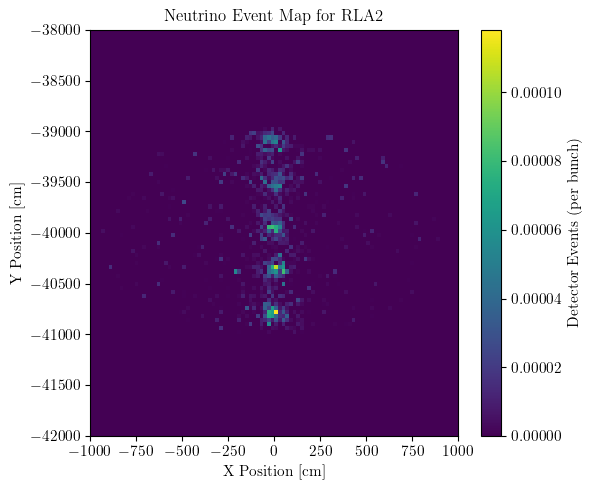

In [30]:
X, Y, event_map = combined_numu.get_event_map_fixed_z(
    detect_loc=[(90e2, 0), (27.45e2-29.11e2, 37.44e2), (29.31e2, (335.06e2)+(27.44e2)+(37.44e2))],
    xrange=(-1000,1000),  
    yrange=(-420e2, -380e2),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, event_map.T, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Events (per bunch)')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Event Map for RLA2")
plt.tight_layout()
plt.show()

In [14]:
np.savetxt('event_map.txt',event_map)

In [15]:
event_array = np.loadtxt('event_map.txt')

In [22]:
max_index = np.where(event_array==np.max(event_array))
print(np.max(event_array))
print(max_index)

x_pos = max_index[1][0]
y_pos = max_index[0][0]
print(X[0][x_pos],Y[y_pos][0])

7.637245425728872e-05
(array([42]), array([49]))
-50.50505050505035 -44050.15151515152


Compare with Racetrack Nu Factory

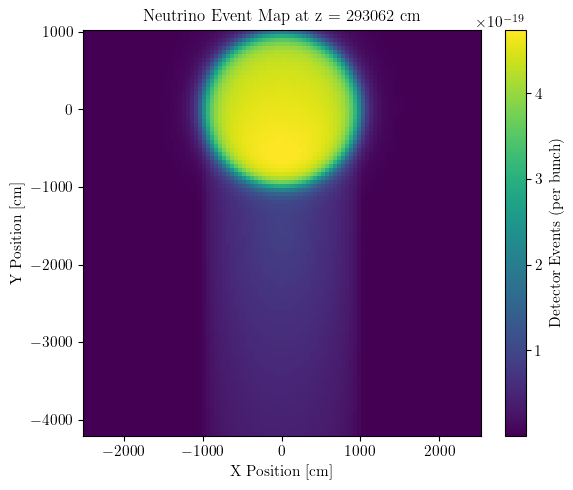

In [32]:
X, Y, nufact_event_map = nufact_numu.get_event_map_fixed_z(
    z_location=7592,           # 10m downstream
    xrange=(-2500,2500),  
    yrange=(-4183, 1000),      
    nx=100,
    ny=100,
    det_radius=10e2              # 10m detector
)

# Visualization
plt.figure(figsize=(6, 5))
c = plt.pcolormesh(X, Y, nufact_event_map, shading='auto', cmap='viridis')
plt.colorbar(c, label='Detector Events (per bunch)')
plt.xlabel('X Position [cm]')
plt.ylabel('Y Position [cm]')
plt.title(f"Neutrino Event Map at z = {293062:.0f} cm")
plt.tight_layout()
plt.show()

In [36]:
np.savetxt('nufact_event_map.txt',nufact_event_map)
nufact_event_array = np.loadtxt('nufact_event_map.txt')

In [37]:
nf_max_index = np.where(nufact_event_array==np.max(nufact_event_array))
print(np.max(nufact_event_array))
print(nf_max_index)

nf_x_pos = nf_max_index[1][0]
nf_y_pos = nf_max_index[0][0]
print(X[0][nf_x_pos],Y[nf_y_pos][0])

4.742854935489355e-19
(array([69]), array([49]))
-25.252525252525174 -570.6060606060605


Check Survival Rates